<a href="https://colab.research.google.com/github/bruna-calistrate/DataWrangling-DailyHappiness/blob/main/Case_2_Data_Enrichment_Daily_Happiness_%26_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enriquecimento dos dados

Após o tratamento realizado no primeiro case, vamos dar continuidade ao proesso de limpeza e estruturação do dataset que será utilizado no modelo preditivo. 

Aqui, iremos enriquecer os dados através de combinação, criação de dimensões, box-cox e discretização.

## Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PowerTransformer, KBinsDiscretizer

## Importar arquivos 

### **churn**

Descrição do status e comportamento do funcionário, se continua na empresa, última participação na pesquisa, padrão de votação e comentários

**Tamanho**: 25 colunas e 4032 linhas
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **stillExists**: informa se o funcionário ainda está na empresa (0-1)
  * tipo int, sem valores nulos
  * True: 1
  * False: 0
* **lastParticipationDate**: data da última participação na pesquisa
  * tipo object, deve ser convertido para datetime, sem valores nulos
* **vote.mean**: média de votos do funcionário (1-4)
  * tipo float, sem valores nulos
* **vote.mode**: moda dos votos do funcionário (1-4)
  * tipo int, sem valores nulos
* **vote.min**: menor nota atribuída pelo funcionário (1-4)
  * tipo int, sem valores nulos
* **vote.max**: maior nota atribuída pelo funcionário (2-4)
  * tipo int, sem valores nulos
* **vote.count**: quantidade de votos por funcionário (1-275)
  * tipo int, sem valores nulos
* **diffDaysVote.min**: menor diferença em dias entre a última participação e o voto (0-0)
  * tipo int, sem valores nulos
  * pouco representativo, pode ser excluído
* **diffDaysVote.max**: máxima diferença em dias entre a última participação e o voto (0-572)
  * tipo int, sem valores nulos
* **diffDaysVote.median**: diferença mediana de dias entre a última participação e o voto (0-330.5)
  * tipo float, sem valores nulos
* **likes.mean**: média de likes nos comentários do funcionário (0-20.6)
  * tipo float, sem valores nulos
* **likes.min**: menor quantidade de likes nos comentários do funcionário (0-12)
  * tipo float, sem valores nulos
* **likes.max**: maior quantidade de lilkes nos comentários do funcionário (0-45)
  * tipo float, sem valores nulos
* **dislikes.mean**: média de dislikes nos comentários do funcionário (0-5.7)
  * tipo float, sem valores nulos
* **dislikes.min**: menor quantidade de dislikes nos comentários do funcionário (0-3)
  * tipo float, sem valores nulos
* **dislikes.max**: maior quantidade de dislikes nos comentários do funcionário (0-18)
  * tipo float, sem valores nulos
* **carac.mean**: média de caracteres nos comentários do funcionário (0.8-283)
  * tipo float, sem valores nulos
* **carac.min**: menor quantidade de caracteres nos comentários do funcionário (0-146)
  * tipo float, sem valores nulos
* **carac.max**: maior quantidade de caracteres nos comentários do funcionário (1-1770)
  * tipo float, sem valores nulos
* **diffDaysComment.min**: menor diferença em dias entre a última participação e o comentário (0-210)
  * tipo float, sem valores nulos
* **diffDaysComment.max**: maior diferença em dias entre a última participação e o  comentário (0-473)
  * tipo float, sem valores nulos
* **diffDaysComment.median**: diferença mediana em dias entre a última participação e o comentário (0-352)
  * tipo float, sem valores nulos
* **commentId.count**: quantidade de comentários por funcionário (0-59)
  * tipo float, sem valores nulos

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
churn = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/churn_merge.csv').iloc[:,1:]

churn.head(3)

,companyAlias,employee,stillExists,lastParticipationDate,vote.mean,vote.mode,vote.min,vote.max,vote.count,diffDaysVote.min,diffDaysVote.max,diffDaysVote.median,likes.mean,likes.min,likes.max,dislikes.mean,dislikes.min,dislikes.max,carac.mean,carac.min,carac.max,diffDaysComment.min,diffDaysComment.max,diffDaysComment.median,commentId.count
0,5370af43e4b0cff95558c12a,18,1,2017-03-12 01:00:00,3.192118,3,1,4,203,0,384,281.0,5.480000,1.0,18.0,0.580000,0.0,3.0,51.24,14.0,139.0,37.0,382.0,326.0,50.0
1,5370af43e4b0cff95558c12a,20,1,2016-12-16 01:00:00,3.666667,4,2,4,51,0,298,246.0,1.400000,0.0,3.0,0.200000,0.0,1.0,8.20,0.0,30.0,16.0,238.0,27.0,5.0
2,5370af43e4b0cff95558c12a,21,1,2016-12-27 01:00:00,3.680556,4,3,4,72,0,309,200.5,3.416667,0.0,8.0,0.333333,0.0,2.0,53.00,8.0,168.0,5.0,308.0,268.0,12.0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   companyAlias            4032 non-null   object 
 1   employee                4032 non-null   int64  
 2   stillExists             4032 non-null   int64  
 3   lastParticipationDate   4032 non-null   object 
 4   vote.mean               4032 non-null   float64
 5   vote.mode               4032 non-null   int64  
 6   vote.min                4032 non-null   int64  
 7   vote.max                4032 non-null   int64  
 8   vote.count              4032 non-null   int64  
 9   diffDaysVote.min        4032 non-null   int64  
 10  diffDaysVote.max        4032 non-null   int64  
 11  diffDaysVote.median     4032 non-null   float64
 12  likes.mean              4032 non-null   float64
 13  likes.min               4032 non-null   float64
 14  likes.max               4032 non-null   

In [5]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4032.0,192.212054,205.965350,1.00,51.000000,131.000000,243.000000,999.000000
stillExists,4032.0,0.860119,0.346906,0.00,1.000000,1.000000,1.000000,1.000000
vote.mean,4032.0,2.960151,0.633997,1.00,2.666667,3.000000,3.333333,4.000000
vote.mode,4032.0,2.986607,0.825252,1.00,3.000000,3.000000,4.000000,4.000000
vote.min,4032.0,1.911706,0.948771,1.00,1.000000,2.000000,3.000000,4.000000
vote.max,4032.0,3.716518,0.510612,2.00,3.000000,4.000000,4.000000,4.000000
vote.count,4032.0,45.905506,57.910857,1.00,6.000000,20.000000,65.000000,275.000000
diffDaysVote.min,4032.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
diffDaysVote.max,4032.0,136.478671,133.881934,0.00,21.000000,107.500000,208.000000,572.000000
diffDaysVote.median,4032.0,73.406746,73.931964,0.00,10.500000,55.000000,113.625000,330.500000


### **churn_plus** 
Informações enriquecidas com gênero dos funcionários e tipo de empresa

**Tamanho** - 4 colunas e 4064 linhas
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **companyType**: tipo de empresa
  * tipo object, sem valores nulos
* **gender**: gênero do funcionário (Female, Male)
  * tipo object, sem valores nulos


In [6]:
churn_plus = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/df_churn_enriq.csv',
                         usecols=['employee', 
                                  'companyAlias',
                                  'gender', 
                                  'companyType'])
churn_plus.head(3)

,employee,companyAlias,companyType,gender
0,512,56aec740f1ef260003e307d6,Product,Male
1,2,56aec740f1ef260003e307d6,Product,Male
2,487,56aec740f1ef260003e307d6,Product,Female


In [7]:
churn_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   employee      4064 non-null   int64 
 1   companyAlias  4064 non-null   object
 2   companyType   4064 non-null   object
 3   gender        4064 non-null   object
dtypes: int64(1), object(3)
memory usage: 127.1+ KB


In [8]:
churn_plus.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4064.0,192.518455,206.118146,1.0,51.0,131.0,244.0,999.0


### **comments_clean** 
Comentário dos funcionários após votação, explicando o seu sentimento e a reação dos colegas

**Tamanho** - 7 colunas e 38993 linhas
* **employee**: número do funcionário (1-999)
  * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
  * tipo object, sem valores nulos
* **commentId**: código hash do comentário
 * tipo object, sem valores nulos
* **likes**: quantidade de curtidas (0-86)
  * tipo int, sem valores nulos
* **dislikes**: quantidade de descurtidas (0-53)
  * tipo int, sem valores nulos
* **commentDate**: data de postagem do comentário
  * tipo object deve ser convertido para datetime, sem valores nulos
* **carac**: quantidade de caracteres dos comentários (0-29057)
  * tipo int, sem valores nulos

In [9]:
comments_clean = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/comments_clean_anonimized_clean.csv').iloc[:,1:]
comments_clean.head(3)

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,4,0,2017-03-20 19:00:17,62
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,1,2,2017-03-20 18:55:16,29
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,3,0,2017-03-20 16:44:02,27


In [10]:
comments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38993 entries, 0 to 38992
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   employee      38993 non-null  int64 
 1   companyAlias  38993 non-null  object
 2   commentId     38993 non-null  object
 3   likes         38993 non-null  int64 
 4   dislikes      38993 non-null  int64 
 5   commentDate   38993 non-null  object
 6   carac         38993 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [11]:
comments_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,38993.0,150.951248,157.277902,1.0,38.0,112.0,207.0,999.0
likes,38993.0,7.002488,7.773628,0.0,2.0,4.0,10.0,86.0
dislikes,38993.0,1.297977,2.748012,0.0,0.0,0.0,1.0,53.0
carac,38993.0,102.140128,202.662014,0.0,27.0,57.0,118.0,29057.0


### **interactions_clean** 

Interações dos funcionários com os comentários de outros colegas da empresa.

**Tamanho** - 5 colunas e 324.471 linhas
* **employee**: número do funcionário (1-999)
 * tipo int, sem valores nulos
* **companyAlias**: código hash da empresa
 * tipo object, sem valores nulos
* **liked**: sem ou com curtida (0-1)
 * tipo int, sem valores nulos
* **disliked**: sem ou com descurtida (0-1)
 * tipo int, sem valores nulos
* **commentId**: código do comentário
 * tipo object, sem valores nulos

In [12]:
interactions_clean = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/DataWrangling-DailyHappiness/main/clean-data/commentInteractions_clean.csv').iloc[:,1:]
interactions_clean.head(3)

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070


In [13]:
interactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324471 entries, 0 to 324470
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      324471 non-null  int64 
 1   companyAlias  324471 non-null  object
 2   liked         324471 non-null  int64 
 3   disliked      324471 non-null  int64 
 4   commentId     324471 non-null  object
dtypes: int64(3), object(2)
memory usage: 12.4+ MB


In [14]:
interactions_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,324471.0,172.173411,178.699301,1.0,45.0,128.0,214.0,999.0
liked,324471.0,0.843696,0.363144,0.0,1.0,1.0,1.0,1.0
disliked,324471.0,0.156304,0.363144,0.0,0.0,0.0,0.0,1.0


## Tratamento inicial de dados

Correção de variáveis para datetime e merge de **gender** e **companyType** na base de **churn**

In [15]:
churn.drop(columns=['diffDaysVote.min'], inplace=True)
churn['lastParticipationDate'] = pd.to_datetime(
    churn['lastParticipationDate'], infer_datetime_format=True
    )

In [16]:
comments_clean['commentDate'] = pd.to_datetime(
    comments_clean['commentDate'], infer_datetime_format=True
    )

In [17]:
churn = churn.merge(churn_plus,
                          on=['companyAlias',
                              'employee'],
                          how='left')

In [18]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   companyAlias            4067 non-null   object        
 1   employee                4067 non-null   int64         
 2   stillExists             4067 non-null   int64         
 3   lastParticipationDate   4067 non-null   datetime64[ns]
 4   vote.mean               4067 non-null   float64       
 5   vote.mode               4067 non-null   int64         
 6   vote.min                4067 non-null   int64         
 7   vote.max                4067 non-null   int64         
 8   vote.count              4067 non-null   int64         
 9   diffDaysVote.max        4067 non-null   int64         
 10  diffDaysVote.median     4067 non-null   float64       
 11  likes.mean              4067 non-null   float64       
 12  likes.min               4067 non-null   float64 

Por serem poucos valores nulos, será utilizado o método ffill

In [19]:
churn.fillna(method='ffill', inplace=True)

## Enriquecimento dos dados

### Combinação de variáveis

#### a) Calcular a razão de likes.mean e dislikes.mean

In [20]:
churn['likesRatio'] = churn['likes.mean'] / churn['dislikes.mean']

#### b) Verificar a existência de valores nulos e infinitos

In [21]:
churn.loc[churn['likesRatio'].isna()].shape

(106, 27)

In [22]:
churn.loc[churn['likesRatio'] == np.inf].shape

(622, 27)

#### c) Preencher nulos como 1

In [23]:
churn.loc[churn['likesRatio'].isna(), 'likesRatio'] = 1

In [24]:
churn.loc[churn['likesRatio'].isna()].shape

(0, 27)

#### d) Plotar histograma
Gerou um pico muito grande em 1, mas existem razões de valor muito superior, gerando uma longa cauda à distribuição e uma grande quantidade de outliers

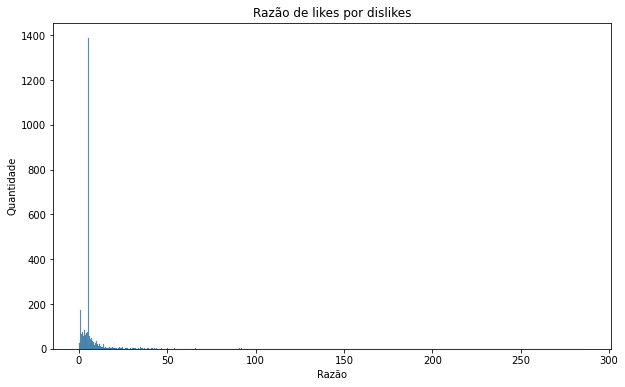

In [25]:
plt.figure(figsize=(10,6))

sns.histplot(data=churn,
             x='likesRatio')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

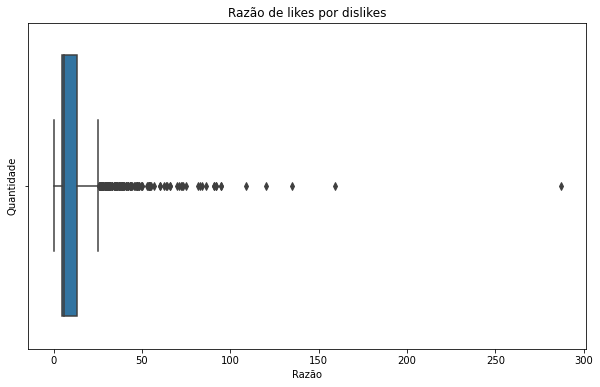

In [26]:
plt.figure(figsize=(10,6))

sns.boxplot(data=churn,
             x='likesRatio')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

#### e) Como ela possui picos indesejados e uma cauda muito longa, aplicar a discretização por equal-frequency utilizando 3 bins

Primeiro, atribuir um valor alto para os infinitos

In [27]:
churn.loc[churn['likesRatio'] == np.inf, 'likesRatio'] = 300

In [28]:
discretizer = KBinsDiscretizer(n_bins=3,
                               encode='ordinal',
                               strategy='quantile')

discretizer.fit(churn[['likesRatio']].values)

churn['likesRatio.d'] = discretizer.transform(churn[['likesRatio']]
                                              .values)

#### f) Visualize a nova distribuição

In [29]:
churn['likesRatio.d'].value_counts()

1.0    1602
2.0    1363
0.0    1102
Name: likesRatio.d, dtype: int64

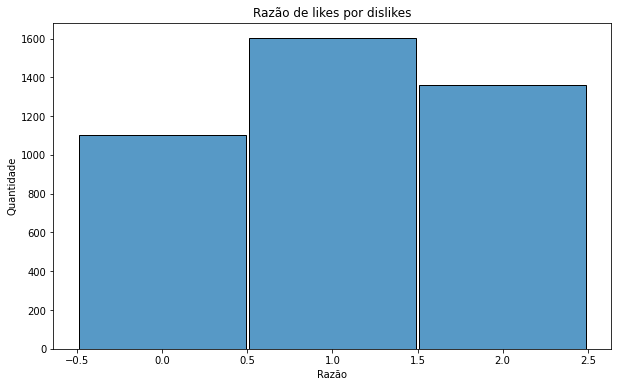

In [30]:
plt.figure(figsize=(10,6))

sns.histplot(data=churn,
             x='likesRatio.d',
             discrete=True,
             shrink=.98)

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')


plt.show()

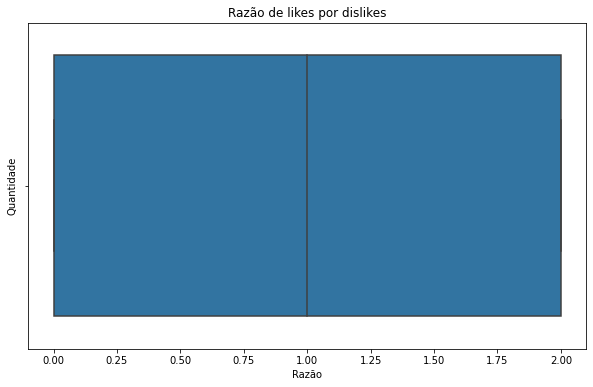

In [31]:
plt.figure(figsize=(10,6))

sns.boxplot(data=churn,
             x='likesRatio.d')

plt.title("Razão de likes por dislikes")
plt.xlabel("Razão")
plt.ylabel('Quantidade')

plt.show()

### Criar nova dimensão
Vamos analizar os comentários, para isso será necessário calcular uma dimensão de comentários que indique se o autor do comentário saiu da empresa ou não.

Isso pode indicar que um funcionário que dê like em comentários de quem saiu da empresa pode ser mais propenso a sair também.

#### a) Fazer um merge entre **comments_clean** e **churn**, trazendo apenas o **stillExists**

In [32]:
comments = comments_clean.merge(churn[['companyAlias', 
                                       'employee', 
                                       'stillExists']],
                                on=['companyAlias',
                                    'employee'],
                                how='left')

Os valores nulos representam funcionários que não estão na base **churn**, então serão excluídos.

In [33]:
comments.shape

(39542, 8)

In [34]:
comments.loc[comments['stillExists'].isna()].shape

(4852, 8)

In [35]:
comments.dropna(axis='index', 
                how='any', 
                inplace=True)
comments.shape

(34690, 8)

In [36]:
comments.head(3)

,employee,companyAlias,commentId,likes,dislikes,commentDate,carac,stillExists
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,4,0,2017-03-20 19:00:17,62,1.0
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,1,2,2017-03-20 18:55:16,29,1.0
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,3,0,2017-03-20 16:44:02,27,1.0


#### b) Fazer um merge entre **interactions_clean** e **comments**, trazendo apenas o **stillExists**

Os valores nulos se referem a comentários inexistentes em **comments** e serão excluídos

In [37]:
interactions = interactions_clean.merge(comments[['commentId', 
                                                  'stillExists']],
                                        on=['commentId'],
                                        how='left')

In [38]:
interactions.shape

(330208, 6)

In [39]:
interactions.loc[interactions['stillExists'].isna()].shape

(55152, 6)

In [40]:
interactions.dropna(axis='index',
                    how='any',
                    inplace=True)
interactions.shape

(275056, 6)

In [41]:
interactions.head(3)

,employee,companyAlias,liked,disliked,commentId,stillExists
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,1.0


#### c) Criar uma pivot table, calculando a média de **stillExists** para cada funcionário de acordo com **liked** e **disliked**

In [42]:
liked_comments = pd.pivot_table(interactions,
                                values='stillExists',
                                index=['companyAlias', 'employee'],
                                columns=['liked', 'disliked'],
                                aggfunc= np.mean,
                                fill_value= 0)

In [43]:
liked_comments.head()

liked                                     0         1
disliked                                  1         0
companyAlias             employee                    
5370af43e4b0cff95558c12a 18        0.444444  0.589912
                         20        0.000000  0.375000
                         21        0.125000  0.595238
                         22        0.500000  0.333333
                         23        0.500000  0.500000

In [44]:
liked_comments.columns = ['disliked', 'liked']

In [45]:
liked_comments.reset_index(inplace=True)
liked_comments.rename(columns={'liked': 'stillExists.meanLikedComments',
                               'disliked': 'stillExists.meanDislikedComments'},
                      inplace=True)

In [46]:
liked_comments.shape

(3123, 4)

#### d) Fazer um merge entre **churn** e **liked_comments**
Transferindo as novas informações criadas para base original.

In [47]:
churn.shape

(4067, 28)

In [48]:
churn = churn.merge(liked_comments,
                    on=['companyAlias', 'employee'],
                    how='left')

In [49]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   companyAlias                      4067 non-null   object        
 1   employee                          4067 non-null   int64         
 2   stillExists                       4067 non-null   int64         
 3   lastParticipationDate             4067 non-null   datetime64[ns]
 4   vote.mean                         4067 non-null   float64       
 5   vote.mode                         4067 non-null   int64         
 6   vote.min                          4067 non-null   int64         
 7   vote.max                          4067 non-null   int64         
 8   vote.count                        4067 non-null   int64         
 9   diffDaysVote.max                  4067 non-null   int64         
 10  diffDaysVote.median               4067 non-null 

Os valores nulos se referem a funcionários que não comentaram, ou cujos comentários não tivem interações, portanto serão preenchidos por 0

In [50]:
churn.loc[churn['stillExists.meanDislikedComments'].isna()].shape

(1058, 30)

In [51]:
churn.loc[churn['stillExists.meanDislikedComments'].isna(), 
          ['stillExists.meanDislikedComments', 
           'stillExists.meanLikedComments']] = 0

In [52]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4067.0,192.624539,206.291948,1.00,51.000000,131.000000,244.000000,999.000000
stillExists,4067.0,0.854438,0.352710,0.00,1.000000,1.000000,1.000000,1.000000
vote.mean,4067.0,2.959289,0.635475,1.00,2.666667,3.000000,3.333333,4.000000
vote.mode,4067.0,2.985739,0.826452,1.00,3.000000,3.000000,4.000000,4.000000
vote.min,4067.0,1.913204,0.949844,1.00,1.000000,2.000000,3.000000,4.000000
vote.max,4067.0,3.716007,0.510824,2.00,3.000000,4.000000,4.000000,4.000000
vote.count,4067.0,45.848291,57.834256,1.00,6.000000,20.000000,65.000000,275.000000
diffDaysVote.max,4067.0,136.111384,133.783987,0.00,21.000000,107.000000,206.500000,572.000000
diffDaysVote.median,4067.0,73.179862,73.901932,0.00,10.500000,55.000000,113.000000,330.500000
likes.mean,4067.0,6.467529,4.338262,0.00,3.500000,6.631448,6.918435,20.648649


### Tratamento de variáveis numéricas


#### a) Plotar histogramas de cada variável numérica, as distribuições são normais?

Não, muitas possuem caudas longas e precisam ser tratadas

In [53]:
num = ['vote.mean', 'vote.mode', 'vote.min', 'vote.max', 'vote.count',
       'diffDaysVote.max', 'diffDaysVote.median', 'likes.mean', 'likes.min',
       'likes.max', 'dislikes.mean', 'dislikes.min', 'dislikes.max',
       'carac.mean', 'carac.min', 'carac.max', 'diffDaysComment.min',
       'diffDaysComment.max', 'diffDaysComment.median', 'commentId.count',
       'likesRatio.d', 'stillExists.meanDislikedComments',
       'stillExists.meanLikedComments']
cat = ['gender', 'companyType']

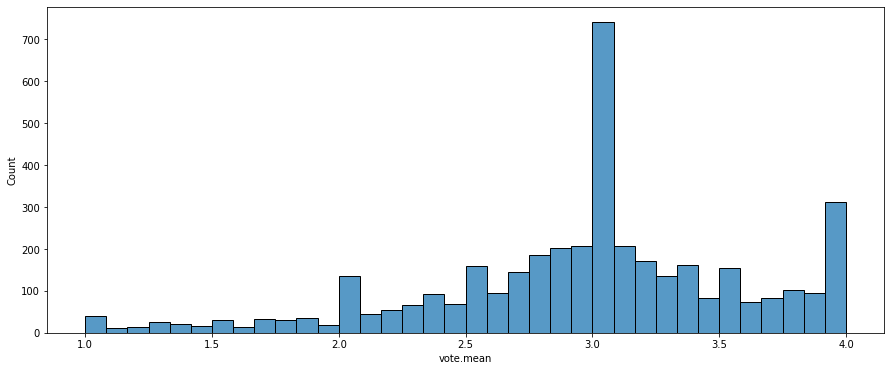

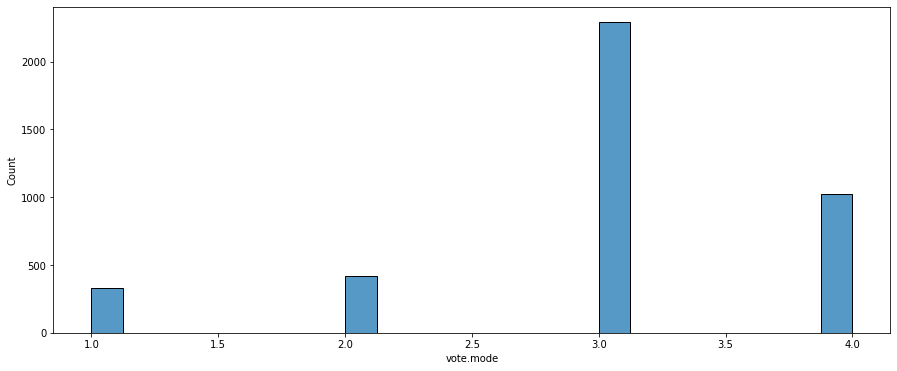

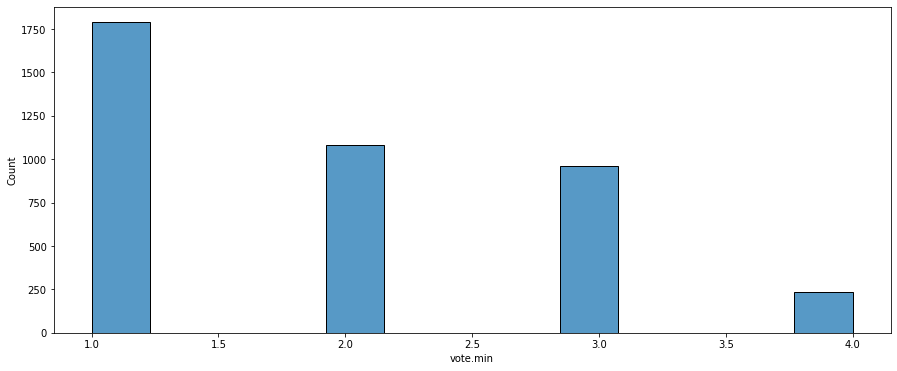

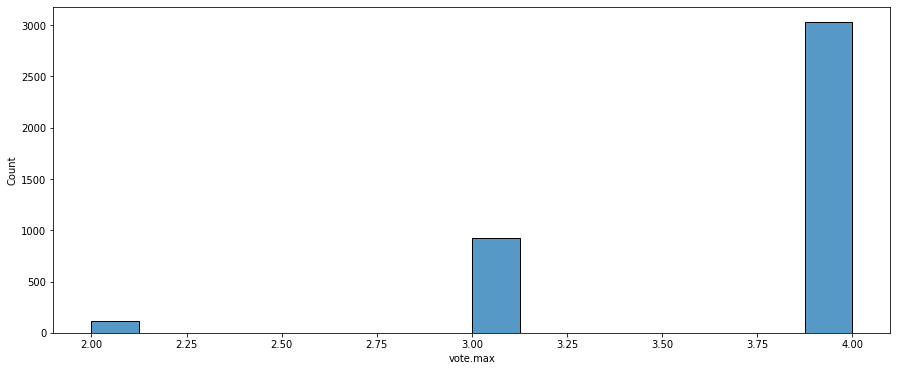

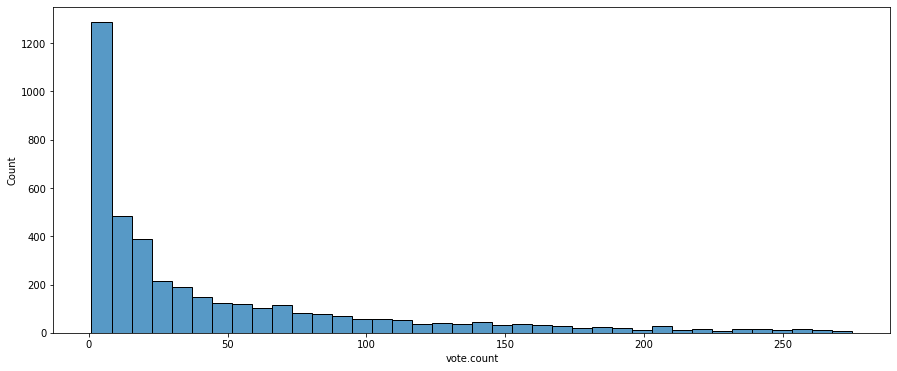

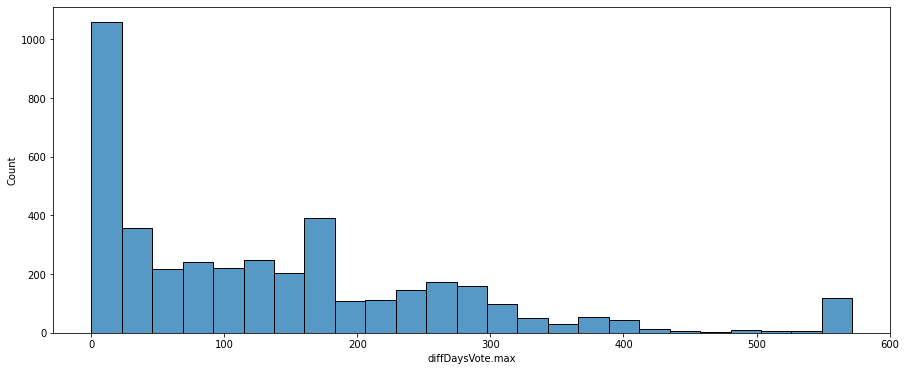

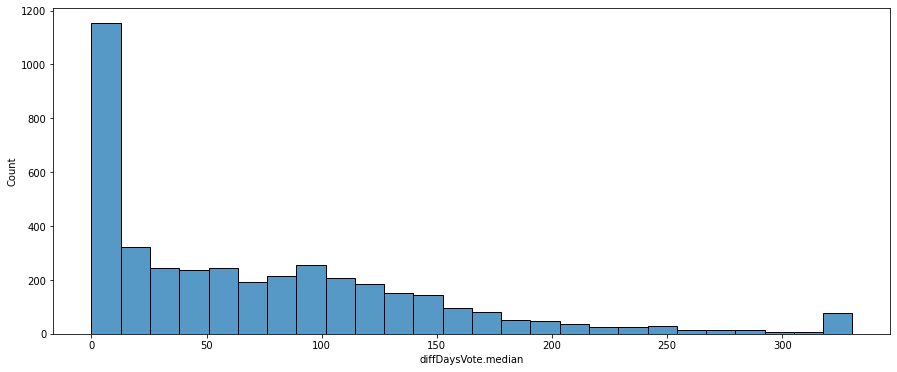

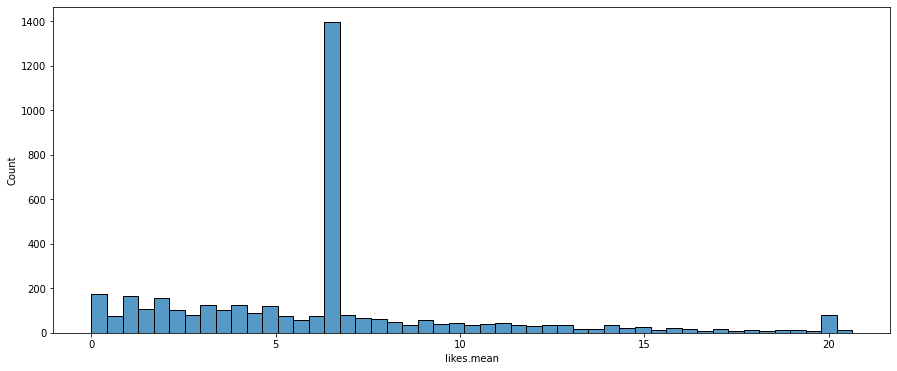

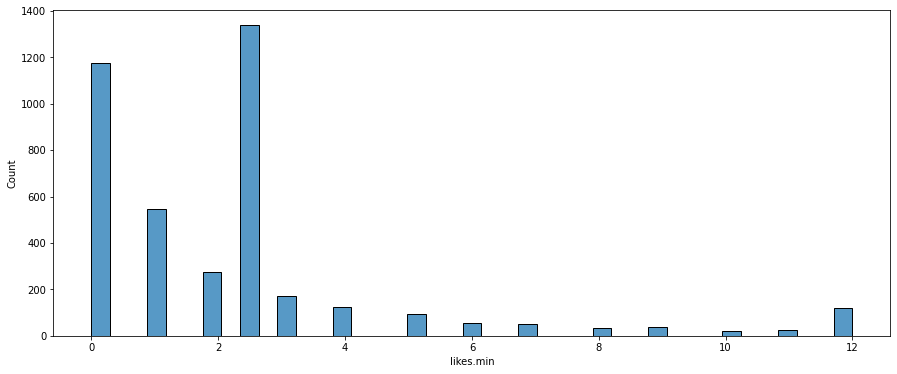

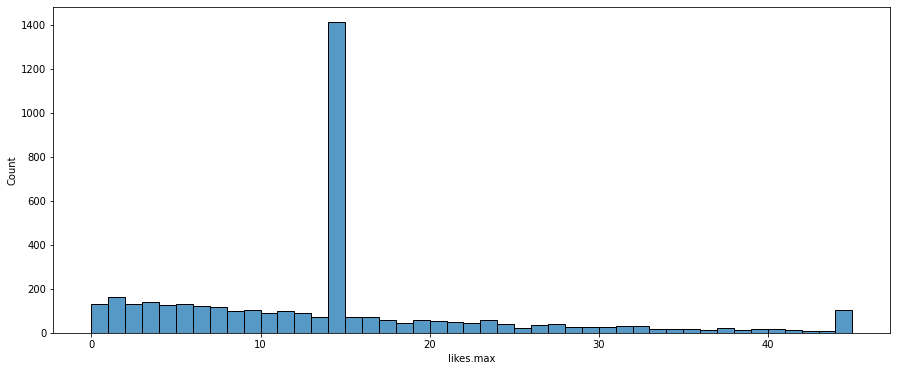

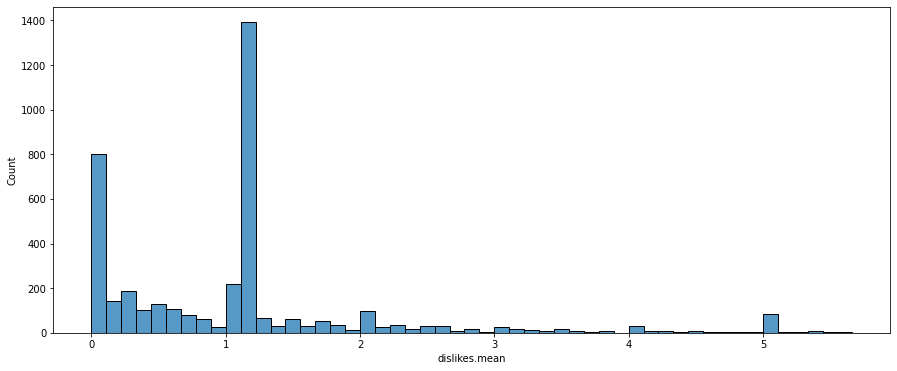

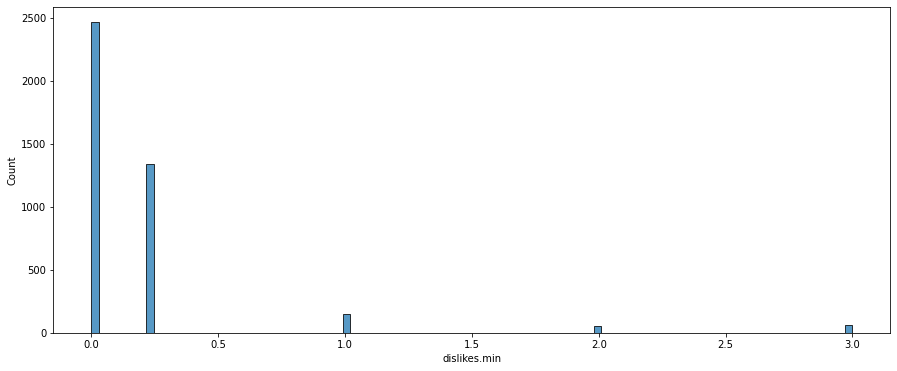

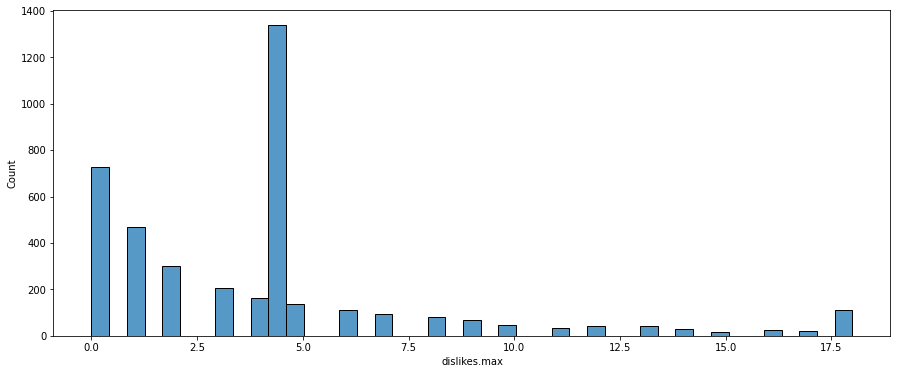

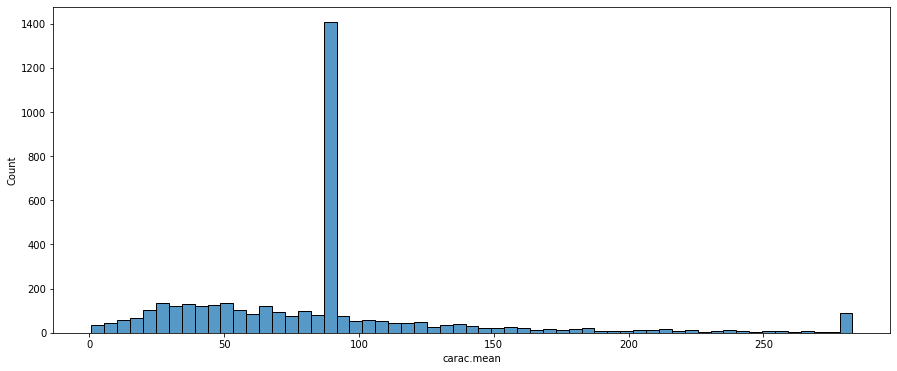

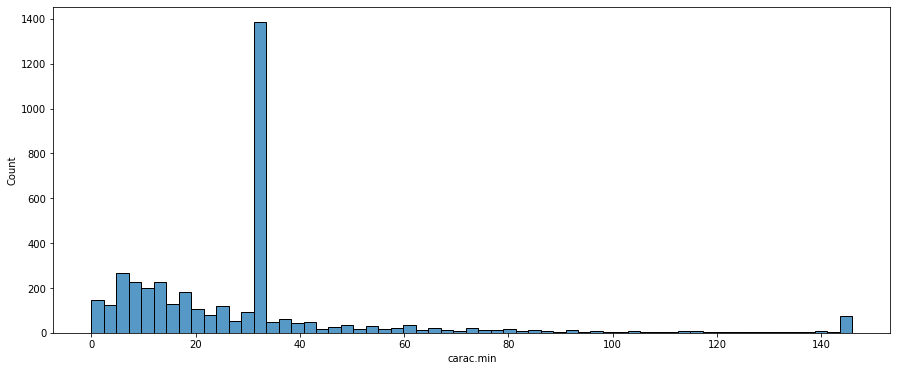

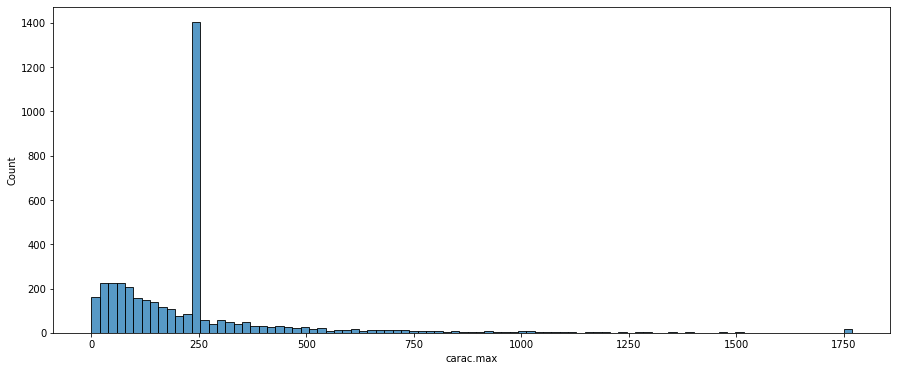

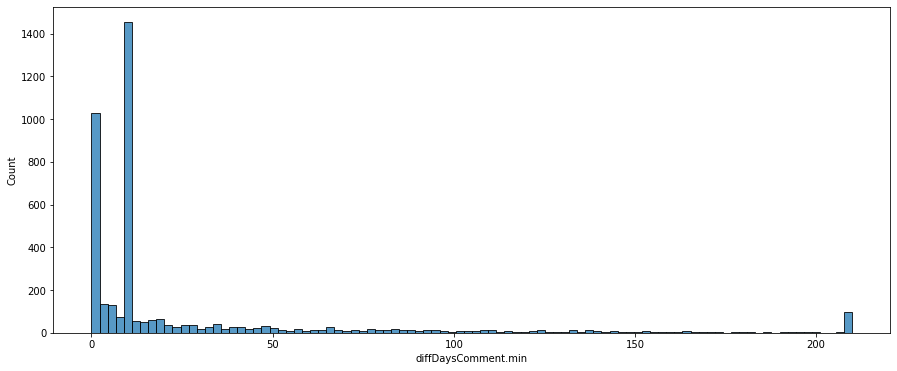

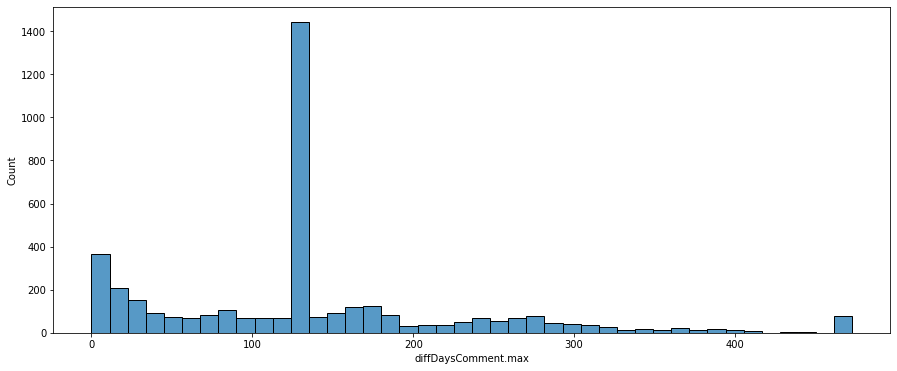

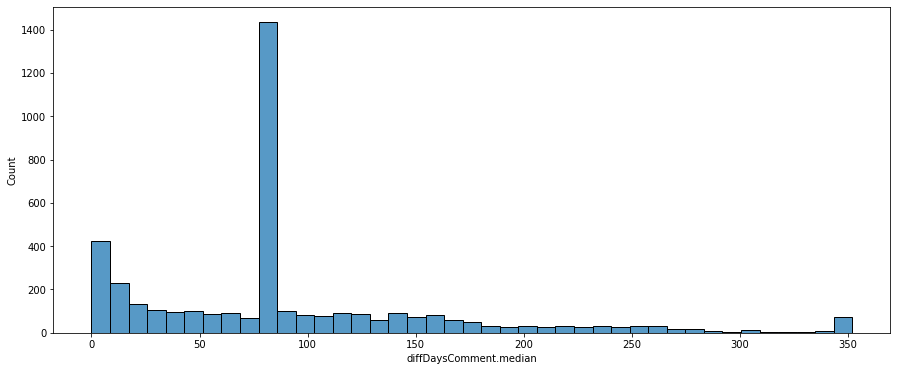

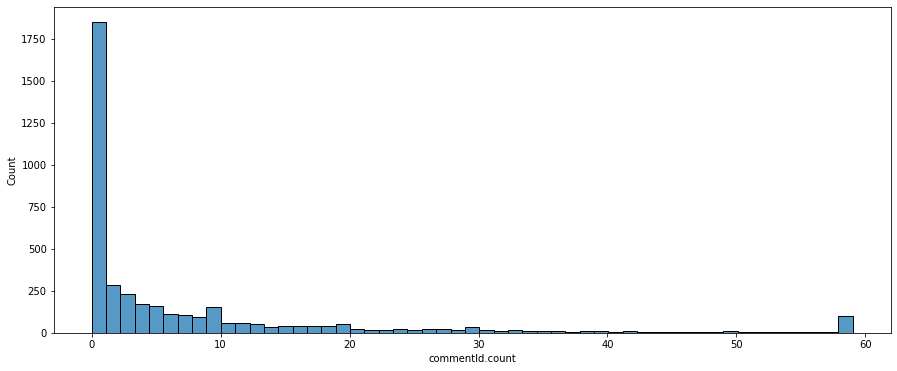

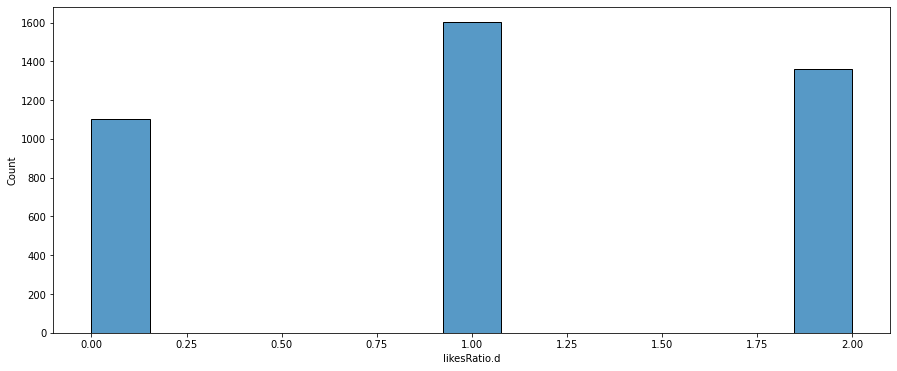

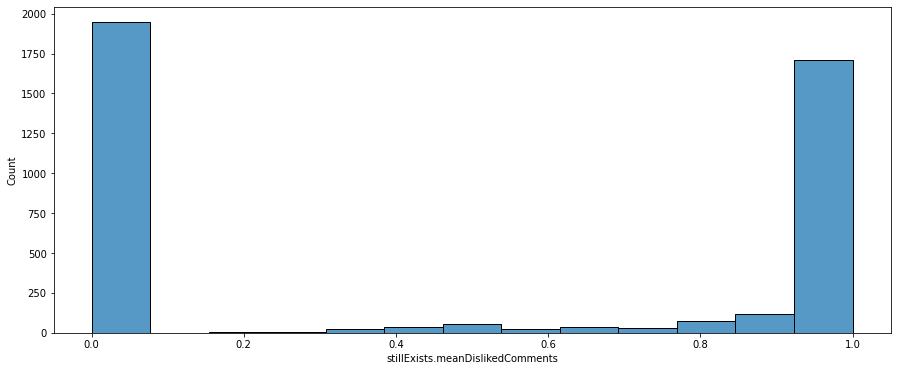

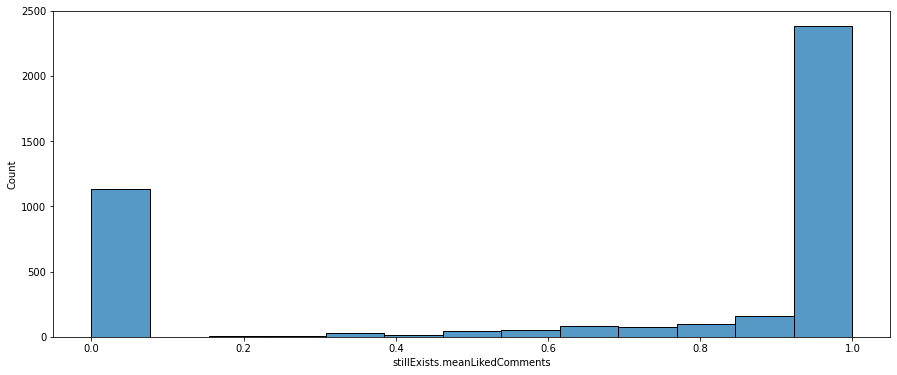

In [54]:
for col in num:
  plt.figure(figsize=(15,6))
  sns.histplot(churn,
                x=col)
  plt.show()

#### b) Muitas variáveis estão com cauda muito longa, aplicar box-cox transformation

Selecionar as colunas com mais cauda para transformação

In [55]:
cols = ['vote.count',
        'diffDaysVote.max', 
        'diffDaysVote.median', 
        'carac.mean', 
        'carac.min', 
        'carac.max', 
        'diffDaysComment.min',
        'diffDaysComment.max', 
        'diffDaysComment.median', 
        'commentId.count']

Aplicar a transformação box-cox. Como ela utiliza base logaritmica, os valore devem ser maiores que zero para evitar erros.

In [56]:
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

In [57]:
cols_pos = []
cols_box = []

for col in cols:
  churn[f'{col}_pos'] = churn[col] + 1
  cols_pos.append(f'{col}_pos')
  cols_box.append(f'{col}_box-cox')


In [58]:
for pos, col in zip(cols_pos, cols):
    churn[f'{col}_box-cox'] = boxcox_transformer.fit_transform(churn[[pos]])
    churn.drop(columns=[pos], inplace=True)


#### c) Visualize os dados após a transformação

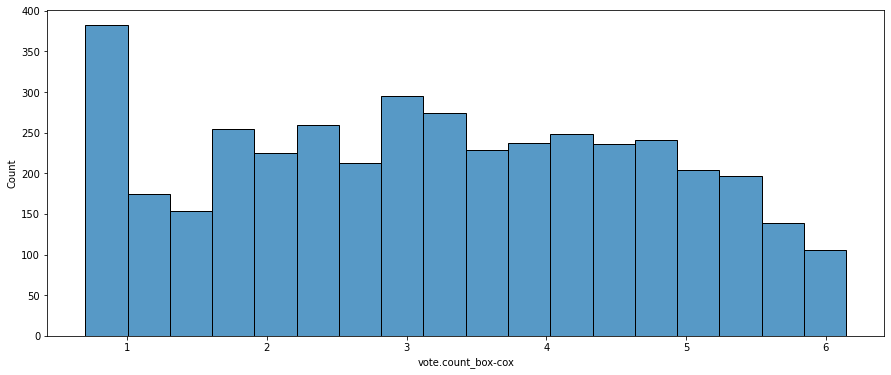

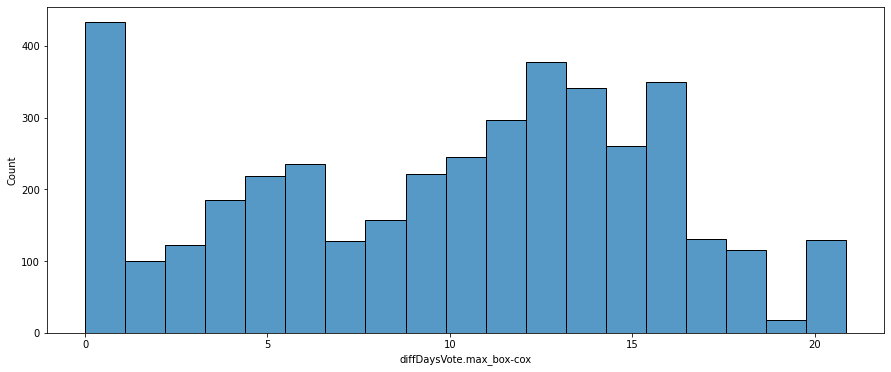

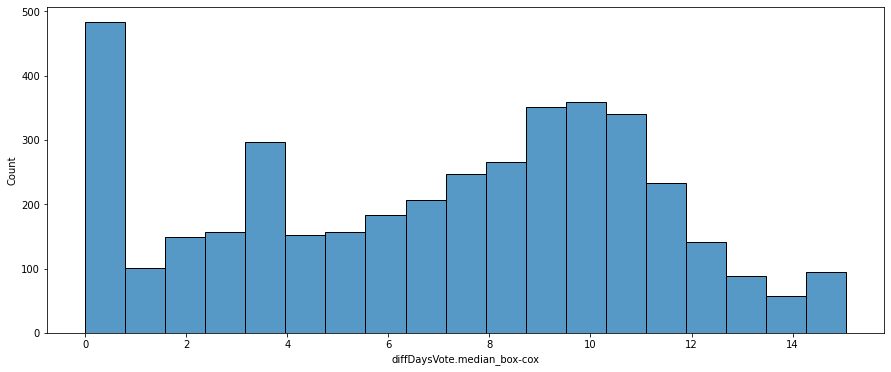

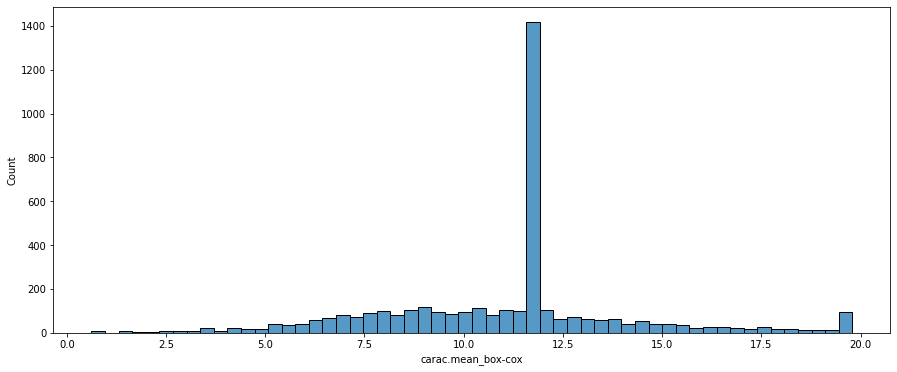

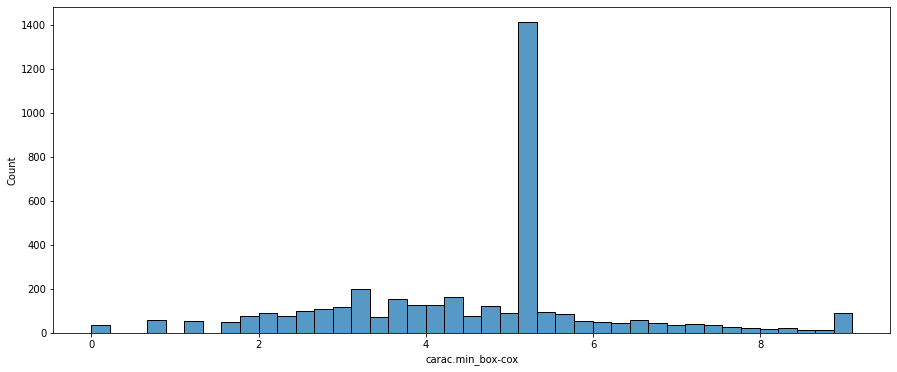

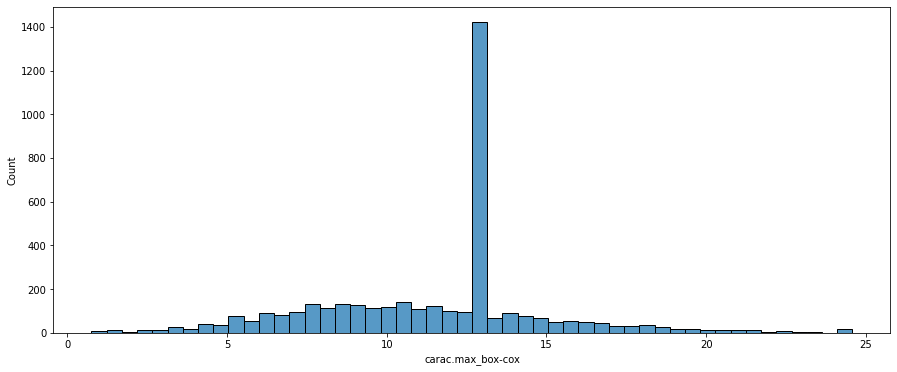

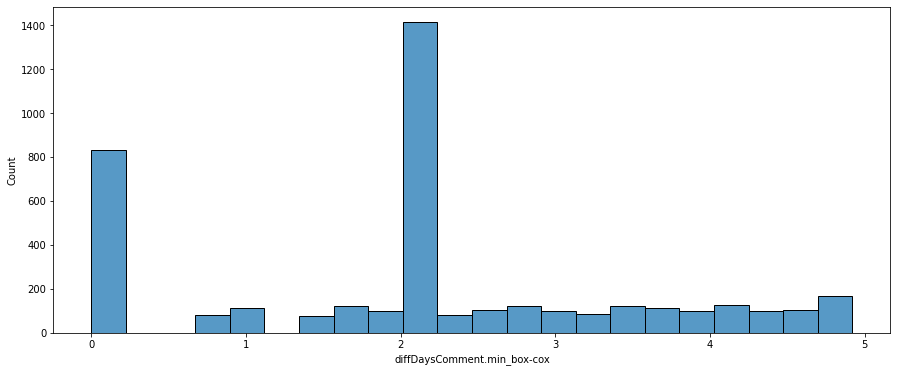

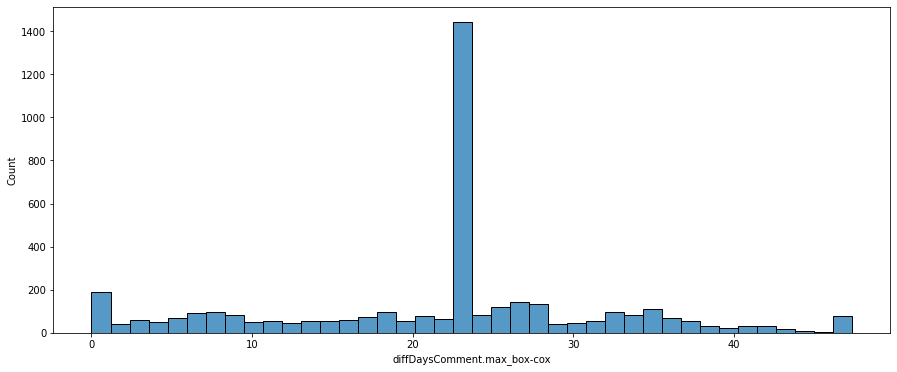

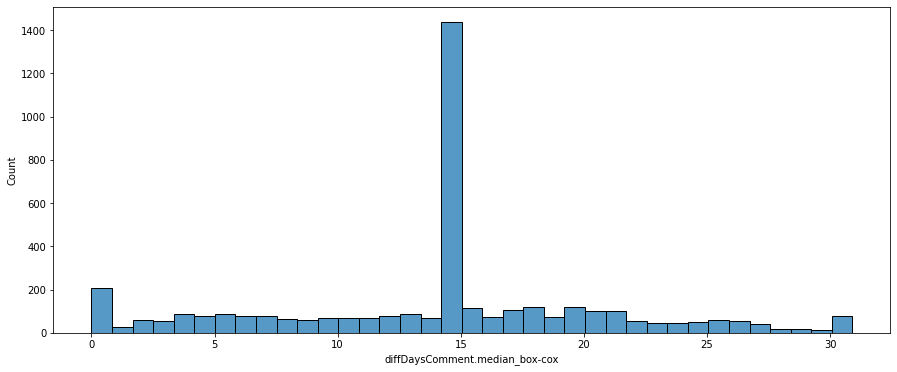

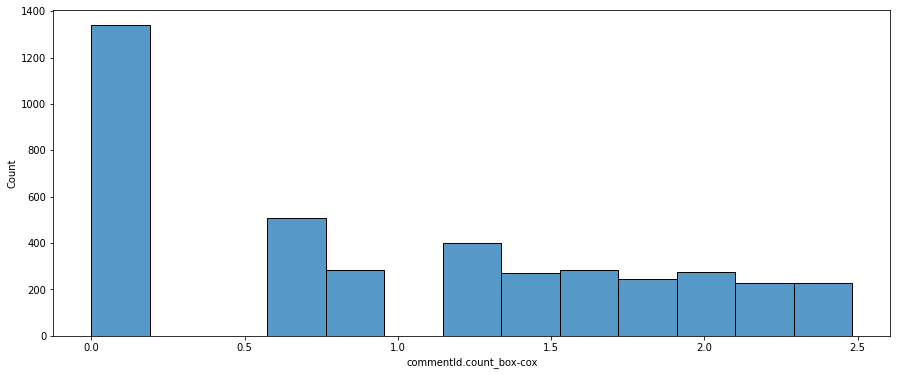

In [59]:
for col in cols_box:
  
  plt.figure(figsize=(15,6))
  sns.histplot(churn,
                x=col)
  plt.show()

### Variáveis categóricas


#### a) Faça um value_counts das variáveis categóricas

In [60]:
churn[cat].value_counts()

gender  companyType
Female  Service        1840
Male    Service        1181
Female  Product         653
Male    Product         393
dtype: int64

#### b) Aplique o One-Hot Encoding para cada uma depas, aplicando o drop_first

In [61]:
churn[
      ['genderMale', 
       'companyTypeService']
      ] = pd.get_dummies(
    churn[cat], 
    prefix=cat,
    drop_first=True)

Confirmar se transformação está correta e remover as colunas **gender** e **companyType**

In [62]:
churn[['gender', 'companyType', 'genderMale', 'companyTypeService']].head()

,gender,companyType,genderMale,companyTypeService
0,Female,Service,0,1
1,Female,Service,0,1
2,Female,Service,0,1
3,Male,Service,1,1
4,Male,Service,1,1


In [63]:
churn.drop(columns=['gender', 'companyType'], inplace=True)

## Validação e limpeza final dos dados

#### a) Ver a correlação entre as variáveis numéricas e categóricas e a variável target **stillExists**

A única correlação mais forte ocorre com **stillExists.meanLikedComments**, ou seja, a média de curtida de comentários aumenta se o funcionário ainda está na empresa.

In [64]:
cols_corr = num + cols_box + ['genderMale', 'companyTypeService']

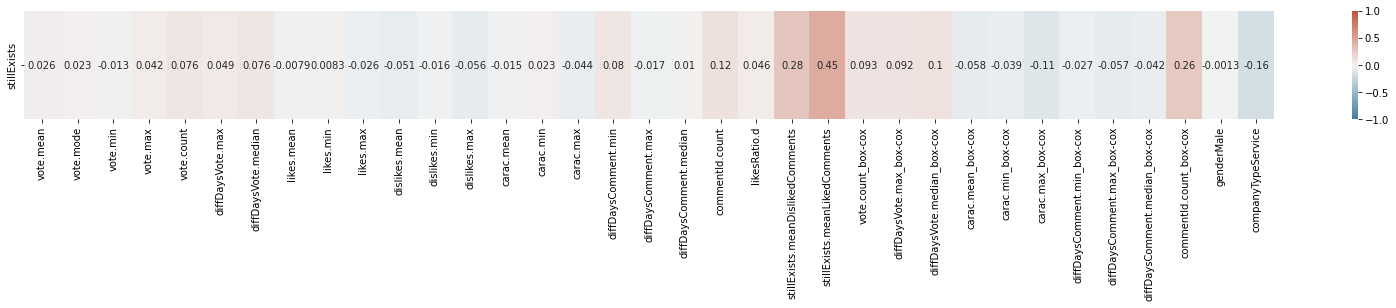

In [65]:
target = ['stillExists']

corr = churn[target + cols_corr].corr()


plt.figure(figsize=(28, 2))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data = corr.loc[target, cols_corr], 
            cmap = cmap, 
            vmin = -1, 
            vmax = 1,
            annot = True)

plt.show()

#### b) Verifique as distribuições e os tipos das variáveis restantes

In [66]:
churn.describe(percentiles=[0.05,
                            0.25,
                            0.50,
                            0.75,
                            0.90,
                            0.99]
                 ).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
employee,4067.0,192.624539,206.291948,1.000000,10.000000,51.000000,131.000000,244.000000,470.400000,926.020000,999.000000
stillExists,4067.0,0.854438,0.352710,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
vote.mean,4067.0,2.959289,0.635475,1.000000,1.745513,2.666667,3.000000,3.333333,3.832634,4.000000,4.000000
vote.mode,4067.0,2.985739,0.826452,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
vote.min,4067.0,1.913204,0.949844,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,4.000000
vote.max,4067.0,3.716007,0.510824,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
vote.count,4067.0,45.848291,57.834256,1.000000,1.000000,6.000000,20.000000,65.000000,133.000000,249.000000,275.000000
diffDaysVote.max,4067.0,136.111384,133.783987,0.000000,0.000000,21.000000,107.000000,206.500000,300.000000,572.000000,572.000000
diffDaysVote.median,4067.0,73.179862,73.901932,0.000000,0.000000,10.500000,55.000000,113.000000,167.200000,330.000000,330.500000
likes.mean,4067.0,6.467529,4.338262,0.000000,0.500000,3.500000,6.631448,6.918435,12.408421,20.000000,20.648649


In [67]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4067 entries, 0 to 4066
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   companyAlias                      4067 non-null   object        
 1   employee                          4067 non-null   int64         
 2   stillExists                       4067 non-null   int64         
 3   lastParticipationDate             4067 non-null   datetime64[ns]
 4   vote.mean                         4067 non-null   float64       
 5   vote.mode                         4067 non-null   int64         
 6   vote.min                          4067 non-null   int64         
 7   vote.max                          4067 non-null   int64         
 8   vote.count                        4067 non-null   int64         
 9   diffDaysVote.max                  4067 non-null   int64         
 10  diffDaysVote.median               4067 non-null 

#### c) Verificar quais colunas manter

As variáveis originais que foram transformadas e discretizadas podem ser retiradas

In [68]:
churn.columns

Index(['companyAlias', 'employee', 'stillExists', 'lastParticipationDate',
       'vote.mean', 'vote.mode', 'vote.min', 'vote.max', 'vote.count',
       'diffDaysVote.max', 'diffDaysVote.median', 'likes.mean', 'likes.min',
       'likes.max', 'dislikes.mean', 'dislikes.min', 'dislikes.max',
       'carac.mean', 'carac.min', 'carac.max', 'diffDaysComment.min',
       'diffDaysComment.max', 'diffDaysComment.median', 'commentId.count',
       'likesRatio', 'likesRatio.d', 'stillExists.meanDislikedComments',
       'stillExists.meanLikedComments', 'vote.count_box-cox',
       'diffDaysVote.max_box-cox', 'diffDaysVote.median_box-cox',
       'carac.mean_box-cox', 'carac.min_box-cox', 'carac.max_box-cox',
       'diffDaysComment.min_box-cox', 'diffDaysComment.max_box-cox',
       'diffDaysComment.median_box-cox', 'commentId.count_box-cox',
       'genderMale', 'companyTypeService'],
      dtype='object')

In [69]:
churn_final = churn[['companyAlias',
                    'employee',
                    'stillExists',
                    'lastParticipationDate',
                    'vote.mean',
                    'vote.mode',
                    'vote.min',
                    'vote.max',
                    # 'vote.count',
                    # 'diffDaysVote.max',
                    # 'diffDaysVote.median',
                    'likes.mean',
                    'likes.min',
                    'likes.max',
                    'dislikes.mean',
                    'dislikes.min',
                    'dislikes.max',
                    # 'carac.mean',
                    # 'carac.min',
                    # 'carac.max',
                    # 'diffDaysComment.min',
                    # 'diffDaysComment.max',
                    # 'diffDaysComment.median',
                    # 'commentId.count',
                    # 'likesRatio',
                    'likesRatio.d',
                    'stillExists.meanDislikedComments',
                    'stillExists.meanLikedComments',
                    'vote.count_box-cox',
                    'diffDaysVote.max_box-cox',
                    'diffDaysVote.median_box-cox',
                    'carac.mean_box-cox',
                    'carac.min_box-cox',
                    'carac.max_box-cox',
                    'diffDaysComment.min_box-cox',
                    'diffDaysComment.max_box-cox',
                    'diffDaysComment.median_box-cox',
                    'commentId.count_box-cox',
                    'genderMale',
                    'companyTypeService']]

In [70]:
churn_final.head(3)

,companyAlias,employee,stillExists,lastParticipationDate,vote.mean,vote.mode,vote.min,vote.max,likes.mean,likes.min,likes.max,dislikes.mean,dislikes.min,dislikes.max,likesRatio.d,stillExists.meanDislikedComments,stillExists.meanLikedComments,vote.count_box-cox,diffDaysVote.max_box-cox,diffDaysVote.median_box-cox,carac.mean_box-cox,carac.min_box-cox,carac.max_box-cox,diffDaysComment.min_box-cox,diffDaysComment.max_box-cox,diffDaysComment.median_box-cox,commentId.count_box-cox,genderMale,companyTypeService
0,5370af43e4b0cff95558c12a,18,1,2017-03-12 01:00:00,3.192118,3,1,4,5.480000,1.0,18.0,0.580000,0.0,3.0,2.0,0.444444,0.589912,5.787542,17.986163,14.212066,9.173535,3.706140,10.456914,3.434799,42.118805,29.750402,2.427911,0,1
1,5370af43e4b0cff95558c12a,20,1,2016-12-16 01:00:00,3.666667,4,2,4,1.400000,0.0,3.0,0.200000,0.0,1.0,1.0,0.000000,0.375000,4.206605,16.338878,13.547952,3.479015,0.000000,5.691789,2.709157,32.398317,7.996463,1.422134,0,1
2,5370af43e4b0cff95558c12a,21,1,2016-12-27 01:00:00,3.680556,4,3,4,3.416667,0.0,8.0,0.333333,0.0,2.0,2.0,0.125000,0.595238,4.592642,16.566176,12.575922,9.322751,2.827828,11.201784,1.741599,37.391760,26.975281,1.853568,0,1


# Exportar arquivos

In [71]:
churn_final.to_csv('/content/churn_final.csv',
                   index = False)